In [47]:
%matplotlib inline
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import data
csv_data = pd.read_csv("Resources/movie_metadata.csv", encoding="utf-8")
df = pd.DataFrame(csv_data)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [48]:
df.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [49]:
df_clean=df.dropna()

In [50]:
df_clean.count()

color                        3756
director_name                3756
num_critic_for_reviews       3756
duration                     3756
director_facebook_likes      3756
actor_3_facebook_likes       3756
actor_2_name                 3756
actor_1_facebook_likes       3756
gross                        3756
genres                       3756
actor_1_name                 3756
movie_title                  3756
num_voted_users              3756
cast_total_facebook_likes    3756
actor_3_name                 3756
facenumber_in_poster         3756
plot_keywords                3756
movie_imdb_link              3756
num_user_for_reviews         3756
language                     3756
country                      3756
content_rating               3756
budget                       3756
title_year                   3756
actor_2_facebook_likes       3756
imdb_score                   3756
aspect_ratio                 3756
movie_facebook_likes         3756
dtype: int64

In [51]:
df_clean["aspect_ratio"].value_counts()

2.35     1988
1.85     1590
1.37       48
1.66       39
1.78       34
1.33       18
2.39       11
2.20       11
2.40        3
2.76        3
2.00        3
1.75        2
2.24        1
1.18        1
2.55        1
1.77        1
16.00       1
1.50        1
Name: aspect_ratio, dtype: int64

In [52]:
facebook_actors = df_clean.loc[df_clean["actor_1_facebook_likes"] > 50000]["actor_1_name"].unique()

In [53]:
facebook_actors

array(['Jimmy Bennett', 'Krista Allen', 'Darcy Donavan',
       'Andrew Fiscella', 'Matthew Ziff'], dtype=object)

In [55]:
budget_imdb_score = df_clean[["budget", "imdb_score"]]

In [56]:
budget_imdb_score

,budget,imdb_score
0,237000000.0,7.9
1,300000000.0,7.1
2,245000000.0,6.8
3,250000000.0,8.5
5,263700000.0,6.6
...,...,...
5026,4500.0,6.9
5027,10000.0,7.5
5033,7000.0,7.0
5035,7000.0,6.9


In [57]:
two_hundred_million_plus =  budget_imdb_score.loc[(budget_imdb_score["budget"] > 200000000)]
one_to_two_hundred_million =  budget_imdb_score.loc[(budget_imdb_score["budget"] >= 100000000) & (budget_imdb_score["budget"] <= 200000000)]
fifty_to_one_hundred_million =  budget_imdb_score.loc[(budget_imdb_score["budget"] >= 50000000) & (budget_imdb_score["budget"] < 100000000)]
under_fifty_million =  budget_imdb_score.loc[(budget_imdb_score["budget"] < 50000000)]

two_hundred_million_plus_mean_imdb = two_hundred_million_plus["imdb_score"].mean()
one_to_two_hundred_million_mean_imdb = one_to_two_hundred_million["imdb_score"].mean()
fifty_to_one_hundred_million_mean_imdb = fifty_to_one_hundred_million["imdb_score"].mean()
under_fifty_million_mean_imdb = under_fifty_million["imdb_score"].mean()

two_hundred_million_plus_sem = two_hundred_million_plus["imdb_score"].sem()
one_to_two_hundred_million_sem = one_to_two_hundred_million["imdb_score"].sem()
fifty_to_one_hundred_million_sem = fifty_to_one_hundred_million["imdb_score"].sem()
under_fifty_million_sem = under_fifty_million["imdb_score"].sem()


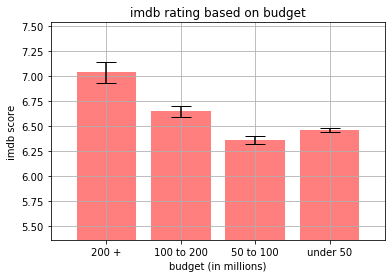

In [59]:

ratings = [two_hundred_million_plus_mean_imdb, one_to_two_hundred_million_mean_imdb, fifty_to_one_hundred_million_mean_imdb, under_fifty_million_mean_imdb]
ratings_sem = [two_hundred_million_plus_sem, one_to_two_hundred_million_sem, fifty_to_one_hundred_million_sem, under_fifty_million_sem]

x_axis = np.arange(len(ratings))
plt.bar(x_axis, ratings, yerr = ratings_sem, color='r', alpha=0.5, align="center", capsize=10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["200 +", "100 to 200", "50 to 100", "under 50"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(ratings)-1, max(ratings)+0.5)

plt.title("imdb rating based on budget")
plt.xlabel("budget (in millions)")
plt.ylabel("imdb score")


plt.grid()

    
plt.show()

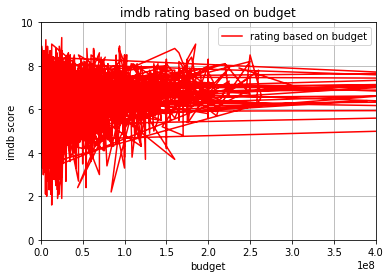

In [60]:


plt.plot(budget_imdb_score["budget"], budget_imdb_score["imdb_score"], color="red", label="rating based on budget")



plt.title("imdb rating based on budget")
plt.xlabel("budget")
plt.ylabel("imdb score")
plt.xlim(0,400000000)
plt.ylim(0,10)
plt.legend(loc="best")
plt.grid()

    
plt.show()

In [61]:
revenue_rating = df_clean[["budget", "gross", "content_rating"]]

In [62]:
revenue_rating["revenue"] = revenue_rating["gross"] - revenue_rating["budget"]

C:\Users\Mike\new\Anaconda3\envs\python1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
revenue_rating

,budget,gross,content_rating,revenue
0,237000000.0,760505847.0,PG-13,523505847.0
1,300000000.0,309404152.0,PG-13,9404152.0
2,245000000.0,200074175.0,PG-13,-44925825.0
3,250000000.0,448130642.0,PG-13,198130642.0
5,263700000.0,73058679.0,PG-13,-190641321.0
...,...,...,...,...
5026,4500.0,136007.0,R,131507.0
5027,10000.0,673780.0,Not Rated,663780.0
5033,7000.0,424760.0,PG-13,417760.0
5035,7000.0,2040920.0,R,2033920.0


In [64]:
g = revenue_rating.loc[revenue_rating["content_rating"] == "G"]
pg = revenue_rating.loc[revenue_rating["content_rating"] == "PG"]
pg_13 = revenue_rating.loc[revenue_rating["content_rating"] == "PG-13"]
r = revenue_rating.loc[revenue_rating["content_rating"] == "R"]
notRated = revenue_rating.loc[(revenue_rating["content_rating"] == "Not Rated") | (revenue_rating["content_rating"] == "Unrated")]
NC_17 = revenue_rating.loc[(revenue_rating["content_rating"] == "NC-17")]
 
g_revenue = g["revenue"].mean()
pg_revenue = pg["revenue"].mean()
pg_13_revenue = pg_13["revenue"].mean()
r_revenue = r["revenue"].mean()
notRated_revenue = notRated["revenue"].mean()
NC_17_revenue = NC_17["revenue"].mean()
                           
g_revenue_sem = g["revenue"].sem()
pg_revenue_sem = pg["revenue"].sem()
pg_13_revenue_sem = pg_13["revenue"].sem()
r_revenue_sem = r["revenue"].sem()
notRated_revenue_sem = notRated["revenue"].sem()
NC_17_revenue_sem = notRated["revenue"].sem()                   

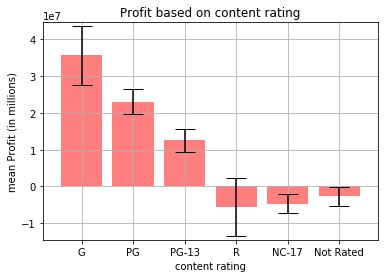

In [66]:
ratings_revenue = [g_revenue, pg_revenue, pg_13_revenue, r_revenue, NC_17_revenue, notRated_revenue]
ratings_revenue_sem = [g_revenue_sem, pg_revenue_sem, pg_13_revenue_sem, r_revenue_sem, NC_17_revenue_sem, notRated_revenue_sem]

x_axis = np.arange(len(ratings_revenue))
plt.bar(x_axis, ratings_revenue, yerr = ratings_revenue_sem, color='r', alpha=0.5, align="center", capsize=10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["G", "PG", "PG-13", "R", "NC-17", "Not Rated"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(ratings_revenue)-9000000, max(ratings_revenue)+9000000)

plt.title("Profit based on content rating")
plt.xlabel("content rating")
plt.ylabel("mean Profit (in millions)")


plt.grid()

    
plt.show()

In [67]:
revenue_rating["content_rating"].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'X', 'Not Rated',
       'Unrated', 'M', 'GP', 'Passed'], dtype=object)

In [68]:
revenue_duration = df_clean[["budget", "gross", "duration"]]
revenue_duration["revenue"] = revenue_duration["gross"] - revenue_duration["budget"]

over_150 = revenue_duration.loc[revenue_duration["duration"] > 150]
between_120_and_150 = revenue_duration.loc[(revenue_duration["duration"] > 120) & (revenue_duration["duration"] <= 150)]
between_90_and_120 = revenue_duration.loc[(revenue_duration["duration"] > 90) & (revenue_duration["duration"] <= 120)]
under_90 = revenue_duration.loc[revenue_duration["duration"] <= 90]

 
over_150_revenue = over_150["revenue"].mean()
between_120_and_150_revenue = between_120_and_150["revenue"].mean()
between_90_and_120_revenue = between_90_and_120["revenue"].mean()
under_90_revenue = under_90["revenue"].mean()

over_150_sem = over_150["revenue"].sem()
between_120_and_150_sem = between_120_and_150["revenue"].sem()
between_90_and_120_sem = between_90_and_120["revenue"].sem()
under_90_sem = under_90["revenue"].sem()



C:\Users\Mike\new\Anaconda3\envs\python1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


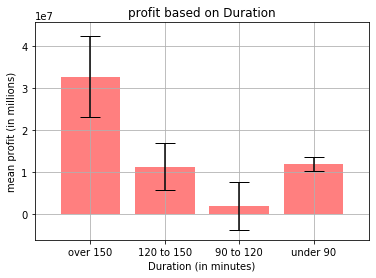

In [70]:
duration_revenue = [over_150_revenue, between_120_and_150_revenue, between_90_and_120_revenue, under_90_revenue]
duration_sem = [over_150_sem, between_120_and_150_sem, between_90_and_120_sem, under_90_sem]

x_axis = np.arange(len(duration_revenue))
plt.bar(x_axis, duration_revenue,  yerr = duration_sem, color='r', alpha=0.5, align="center", capsize=10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["over 150", "120 to 150", "90 to 120", "under 90"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(duration_revenue)-8000000, max(duration_revenue)+13000000)

plt.title("profit based on Duration")
plt.xlabel("Duration (in minutes)")
plt.ylabel("mean profit (in millions)")


plt.grid()

    
plt.show()

In [71]:
imdb_score_content_rating = df_clean[["imdb_score", "content_rating"]]
g = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "G"]
pg = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "PG"]
pg_13 = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "PG-13"]
r = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "R"]
nc_17 = imdb_score_content_rating.loc[imdb_score_content_rating["content_rating"] == "NC-17"]
notRated = imdb_score_content_rating.loc[(imdb_score_content_rating["content_rating"] == "Not Rated") | (imdb_score_content_rating["content_rating"] == "Unrated")]

 
g_score = g["imdb_score"].mean()
pg_score = pg["imdb_score"].mean()
pg_13_score = pg_13["imdb_score"].mean()
r_score = r["imdb_score"].mean()
nc_17_score = nc_17["imdb_score"].mean()
notRated_score = notRated["imdb_score"].mean()

g_sem = g["imdb_score"].sem()
pg_sem = pg["imdb_score"].sem()
pg_13_sem = pg_13["imdb_score"].sem()
r_sem = r["imdb_score"].sem()
nc_17_sem = nc_17["imdb_score"].sem() 
notRated_sem = notRated["imdb_score"].sem()

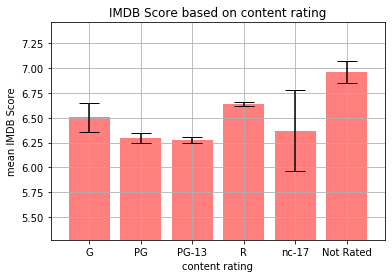

In [73]:
score_rating = [g_score, pg_score, pg_13_score, r_score, nc_17_score, notRated_score]
score_rating_sem = [g_sem, pg_sem, pg_13_sem, r_sem, nc_17_sem, notRated_sem]

x_axis = np.arange(len(score_rating))
plt.bar(x_axis, score_rating, yerr = score_rating_sem, color='r', alpha=0.5, align="center", capsize=10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["G", "PG", "PG-13", "R", "nc-17", "Not Rated"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(score_rating)-1, max(score_rating)+0.5)

plt.title("IMDB Score based on content rating")
plt.xlabel("content rating")
plt.ylabel("mean IMDB Score")


plt.grid()

    
plt.show()

In [74]:
profit_budget = df_clean[["budget", "gross"]]
profit_budget["profit"] = profit_budget["gross"] - profit_budget["budget"]


 
over_150_revenue = over_150["revenue"].mean()
between_120_and_150_revenue = between_120_and_150["revenue"].mean()
between_90_and_120_revenue = between_90_and_120["revenue"].mean()
under_90_revenue = under_90["revenue"].mean()

over_150_sem = over_150["revenue"].sem()
between_120_and_150_sem = between_120_and_150["revenue"].sem()
between_90_and_120_sem = between_90_and_120["revenue"].sem()
under_90_sem = under_90["revenue"].sem()


profit_budget

C:\Users\Mike\new\Anaconda3\envs\python1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,budget,gross,profit
0,237000000.0,760505847.0,523505847.0
1,300000000.0,309404152.0,9404152.0
2,245000000.0,200074175.0,-44925825.0
3,250000000.0,448130642.0,198130642.0
5,263700000.0,73058679.0,-190641321.0
...,...,...,...
5026,4500.0,136007.0,131507.0
5027,10000.0,673780.0,663780.0
5033,7000.0,424760.0,417760.0
5035,7000.0,2040920.0,2033920.0


In [75]:
pop = df_clean[["movie_facebook_likes", "budget"]]
pop

,movie_facebook_likes,budget
0,33000,237000000.0
1,0,300000000.0
2,85000,245000000.0
3,164000,250000000.0
5,24000,263700000.0
...,...,...
5026,171,4500.0
5027,697,10000.0
5033,19000,7000.0
5035,0,7000.0


In [76]:
budget_facebook = df_clean[["budget", "movie_facebook_likes"]]

budget_facebook_two_hundred_million_plus =  budget_facebook.loc[(budget_facebook["budget"] > 200000000)]
budget_facebook_one_to_two_hundred_million =  budget_facebook.loc[(budget_facebook["budget"] >= 100000000) & (budget_facebook["budget"] <= 200000000)]
budget_facebook_fifty_to_one_hundred_million =  budget_facebook.loc[(budget_facebook["budget"] >= 50000000) & (budget_facebook["budget"] < 100000000)]
budget_facebook_under_fifty_million =  budget_facebook.loc[(budget_facebook["budget"] < 50000000)]

budget_facebook_two_hundred_million_plus_mean = budget_facebook_two_hundred_million_plus["movie_facebook_likes"].mean()
budget_facebook_one_to_two_hundred_million_mean = budget_facebook_one_to_two_hundred_million["movie_facebook_likes"].mean()
budget_facebook_fifty_to_one_hundred_million_mean = budget_facebook_fifty_to_one_hundred_million["movie_facebook_likes"].mean()
budget_facebook_under_fifty_million_mean = budget_facebook_under_fifty_million["movie_facebook_likes"].mean()

budget_facebook_two_hundred_million_plus_sem = budget_facebook_two_hundred_million_plus["movie_facebook_likes"].sem()
budget_facebook_one_to_two_hundred_million_sem = budget_facebook_one_to_two_hundred_million["movie_facebook_likes"].sem()
budget_facebook_fifty_to_one_hundred_million_sem = budget_facebook_fifty_to_one_hundred_million["movie_facebook_likes"].sem()
budget_facebook_under_fifty_million_sem = budget_facebook_under_fifty_million["movie_facebook_likes"].sem()


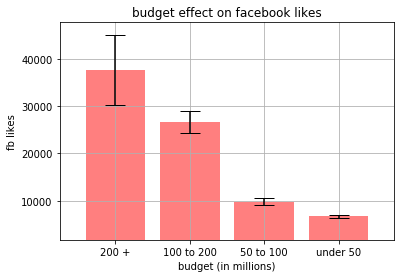

In [78]:

fb_likes = [budget_facebook_two_hundred_million_plus_mean, budget_facebook_one_to_two_hundred_million_mean, budget_facebook_fifty_to_one_hundred_million_mean, budget_facebook_under_fifty_million_mean]
fb_likes_sem = [budget_facebook_two_hundred_million_plus_sem, budget_facebook_one_to_two_hundred_million_sem, budget_facebook_fifty_to_one_hundred_million_sem, budget_facebook_under_fifty_million_sem]

x_axis = np.arange(len(fb_likes))
plt.bar(x_axis, fb_likes, yerr = fb_likes_sem, color='r', alpha=0.5, align="center", capsize=10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["200 +", "100 to 200", "50 to 100", "under 50"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(fb_likes)-5000, max(fb_likes)+10000)

plt.title("budget effect on facebook likes")
plt.xlabel("budget (in millions)")
plt.ylabel("fb likes")


plt.grid()

    
plt.show()

In [79]:
budget_profit = df_clean[["budget", "gross"]]
budget_profit["budget"].head(50)

0     237000000.0
1     300000000.0
2     245000000.0
3     250000000.0
5     263700000.0
6     258000000.0
7     260000000.0
8     250000000.0
9     250000000.0
10    250000000.0
11    209000000.0
12    200000000.0
13    225000000.0
14    215000000.0
15    225000000.0
16    225000000.0
17    220000000.0
18    250000000.0
19    225000000.0
20    250000000.0
21    230000000.0
22    200000000.0
23    225000000.0
24    180000000.0
25    207000000.0
26    200000000.0
27    250000000.0
28    209000000.0
29    150000000.0
30    200000000.0
31    200000000.0
32    200000000.0
33    200000000.0
34    210000000.0
35    200000000.0
36    200000000.0
37    210000000.0
38    215000000.0
39    200000000.0
40    170000000.0
41    200000000.0
42    200000000.0
43    200000000.0
44    200000000.0
45    190000000.0
46    190000000.0
47    200000000.0
48    190000000.0
49    195000000.0
50    105000000.0
Name: budget, dtype: float64

In [80]:
budget_profit = df_clean[["budget", "gross"]]
budget_profit["profit"] = budget_profit["gross"] - budget_profit["budget"]

budget_profit_over_200 = budget_profit.loc[budget_profit["budget"] > 200000000]
budget_profit_between_100_and_200 = budget_profit.loc[(budget_profit["budget"] > 100000000) & (budget_profit["budget"] <= 200000000)]
budget_profit_between_under_100 = budget_profit.loc[(budget_profit["budget"] < 100000000)]


 
budget_profit_over_200_mean = budget_profit_over_200["profit"].mean()
budget_profit_between_100_and_200_mean = budget_profit_between_100_and_200["profit"].mean()
budget_profit_between_under_100_mean = budget_profit_between_under_100["profit"].mean()


budget_profit_over_200_sem = budget_profit_over_200["profit"].sem()
budget_profit_between_100_and_200_sem = budget_profit_between_100_and_200["profit"].sem()
budget_profit_between_under_100_sem = budget_profit_between_under_100["profit"].sem()

budget_profit_over_200["profit"].head(50)

C:\Users\Mike\new\Anaconda3\envs\python1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       5.235058e+08
1       9.404152e+06
2      -4.492582e+07
3       1.981306e+08
5      -1.906413e+08
6       7.853030e+07
7      -5.919274e+07
8       2.089916e+08
9       5.195698e+07
10      8.024906e+07
11     -8.930592e+06
13      1.980326e+08
14     -1.257101e+08
15      6.602156e+07
16     -8.338598e+07
17      4.032795e+08
18     -8.936125e+06
19     -4.597915e+07
20      5.108370e+06
21      3.203066e+07
23      3.335535e+07
25      1.105126e+07
27      1.571973e+08
28     -1.438268e+08
34      2.436001e+07
37      3.542814e+07
38      1.990308e+07
794     4.032795e+08
1016   -3.758687e+08
1338   -5.530052e+08
2049    1.105126e+07
2323   -2.397702e+09
2334   -2.127110e+09
2740   -2.998979e+08
2988   -1.221330e+10
3005   -2.499804e+09
3075   -6.967246e+08
3311   -3.995457e+08
3423   -1.099561e+09
3461    7.853030e+07
3851   -6.983127e+08
3859   -4.199788e+09
4542   -9.899626e+08
4694    1.105126e+07
4778    1.990308e+07
Name: profit, dtype: float64

No handles with labels found to put in legend.


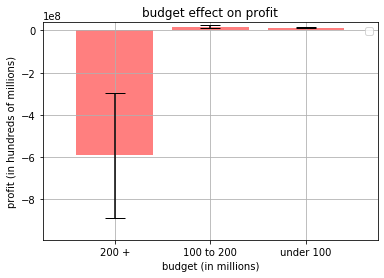

In [81]:

profit = [budget_profit_over_200_mean, budget_profit_between_100_and_200_mean, budget_profit_between_under_100_mean]
profit_sem = [budget_profit_over_200_sem, budget_profit_between_100_and_200_sem, budget_profit_between_under_100_sem]

x_axis = np.arange(len(profit))
plt.bar(x_axis, profit, yerr = profit_sem, color='r', alpha=0.5, align="center", capsize=10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["200 +", "100 to 200", "under 100"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(min(profit)-400000000, max(profit)+20000000)

plt.title("budget effect on profit")
plt.xlabel("budget (in millions)")
plt.ylabel("profit (in hundreds of millions)")

plt.legend(loc="best")
plt.grid()


plt.show()